In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from numpy.random import seed

In [2]:
# definição da seed do python
seed(1)
# e seed do tensorflow
tf.random.set_seed(2)

In [3]:
# definição do ficheiro de dados (treino/validação)
symbol = 'ada'
crypto_ta_dataset_fp = "crypto_ta_" + symbol + ".csv"

In [4]:
# Nomes das classses
class_names = ['Very Low', 'Low', 'High', 'Very High']

In [5]:
# ler o ficheiro de dados, indicando o ficheiro e indicamos os nomes das colunas (que não estão no ficheiro)
crypto_ta_dataset = pd.read_csv(crypto_ta_dataset_fp)
# remover as colunas que nao interessam
# crypto_ta_dataset.drop('bbands_up', axis=1, inplace=True)
# crypto_ta_dataset.drop('bbands_mid', axis=1, inplace=True)
# crypto_ta_dataset.drop('bbands_low', axis=1, inplace=True)
# crypto_ta_dataset.drop('macd', axis=1, inplace=True)
# crypto_ta_dataset.drop('macdsignal', axis=1, inplace=True)
# crypto_ta_dataset.drop('macdhist', axis=1, inplace=True)
# crypto_ta_dataset.drop('roc', axis=1, inplace=True)
# crypto_ta_dataset.drop('rocr', axis=1, inplace=True)
# imprime um as primeiras linhas dos dados
print(crypto_ta_dataset.head())

crypto_ta_dataset['sma_7'] = [x * 100 for x in crypto_ta_dataset['sma_7']]
crypto_ta_dataset['sma_25'] = [x * 100 for x in crypto_ta_dataset['sma_25']]
crypto_ta_dataset['sma_99'] = [x * 100 for x in crypto_ta_dataset['sma_99']]
crypto_ta_dataset['sma_200'] = [x * 100 for x in crypto_ta_dataset['sma_200']]
crypto_ta_dataset['ema_9'] = [x * 100 for x in crypto_ta_dataset['ema_9']]
crypto_ta_dataset['ema_26'] = [x * 100 for x in crypto_ta_dataset['ema_26']]
crypto_ta_dataset['sma_vol'] = [x * 100 for x in crypto_ta_dataset['sma_vol']]
crypto_ta_dataset['bbands_up'] = [x * 100 for x in crypto_ta_dataset['bbands_up']]
crypto_ta_dataset['bbands_mid'] = [x * 100 for x in crypto_ta_dataset['bbands_mid']]
crypto_ta_dataset['bbands_low'] = [x * 100 for x in crypto_ta_dataset['bbands_low']]

# colunas que são features e coluna que é a label (a ultima neste caso)
feature_names = crypto_ta_dataset.columns[:-1]
label_name = crypto_ta_dataset.columns[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

      sma_7    sma_25    sma_99   sma_200     ema_9    ema_26   sma_vol  \
0 -0.554958  2.531938 -0.999672  0.526531  0.037076  1.278710 -8.327822   
1 -0.275160  1.636650 -0.925994  0.494158 -0.816688  0.806651 -5.955354   
2 -1.378247  1.629559 -0.963406  0.474333 -1.379964  0.437072 -1.792471   
3 -2.164224  1.519429 -0.678862  0.463992 -1.461086  0.261597 -2.650524   
4 -3.171230  0.954201 -0.751381  0.431485 -2.418561 -0.259445 -3.753348   

   bbands_up  bbands_mid  bbands_low        rsi        cmo      macd  \
0   0.519848    1.488042    3.180308  62.130607  24.261214  0.038312   
1  -0.590875    1.434539    4.883398  57.948871  15.897743  0.035037   
2  -0.563702    0.954563    3.404918  54.603625   9.207249  0.031077   
3  -0.451834    0.670715    2.412885  53.062467   6.124934  0.027156   
4  -0.010592    0.014049    0.051220  47.888921  -4.222159  0.022123   

   macdsignal  macdhist        ppo       roc  linearreg       tsf  trend  
0    0.037133  0.001179  16.642994 -4.456

In [6]:
crypto_ta_dataset[label_name] = crypto_ta_dataset[label_name].map(
    {"V_LOW":0,"LOW":1,"HIGH":2,"V_HIGH":3})

print(crypto_ta_dataset)
# criamos duas variáveis, uma para os dados e outra para as labels (vamos precisar depois)
features = crypto_ta_dataset.copy()
labels = features.pop(label_name)
# normalization dataset
# features = tf.keras.utils.normalize(features, axis=-1, order=2)

# imprime um resumo dos valores
# print(features)

            sma_7      sma_25     sma_99    sma_200       ema_9      ema_26  \
0      -55.495757  253.193839 -99.967201  52.653064    3.707557  127.870998   
1      -27.515993  163.665023 -92.599393  49.415797  -81.668833   80.665064   
2     -137.824701  162.955927 -96.340589  47.433265 -137.996444   43.707169   
3     -216.422366  151.942890 -67.886244  46.399235 -146.108595   26.159736   
4     -317.122981   95.420130 -75.138054  43.148498 -241.856143  -25.944472   
...           ...         ...        ...        ...         ...         ...   
21950   -6.141696    0.859801  -4.777823  -3.106005  -27.028740  -12.899406   
21951  -11.905098    5.212951  -6.166774  -2.620573   -6.556993   -6.387656   
21952   -7.274162    3.312659  -4.895624  -2.274572   -2.480013   -4.898229   
21953   -3.815606   -3.177431  -4.303399  -2.817932   -4.602753   -5.502359   
21954    2.397534   -3.973283  -2.707639  -2.952432    4.477249   -2.090197   

          sma_vol  bbands_up  bbands_mid  bbands_lo

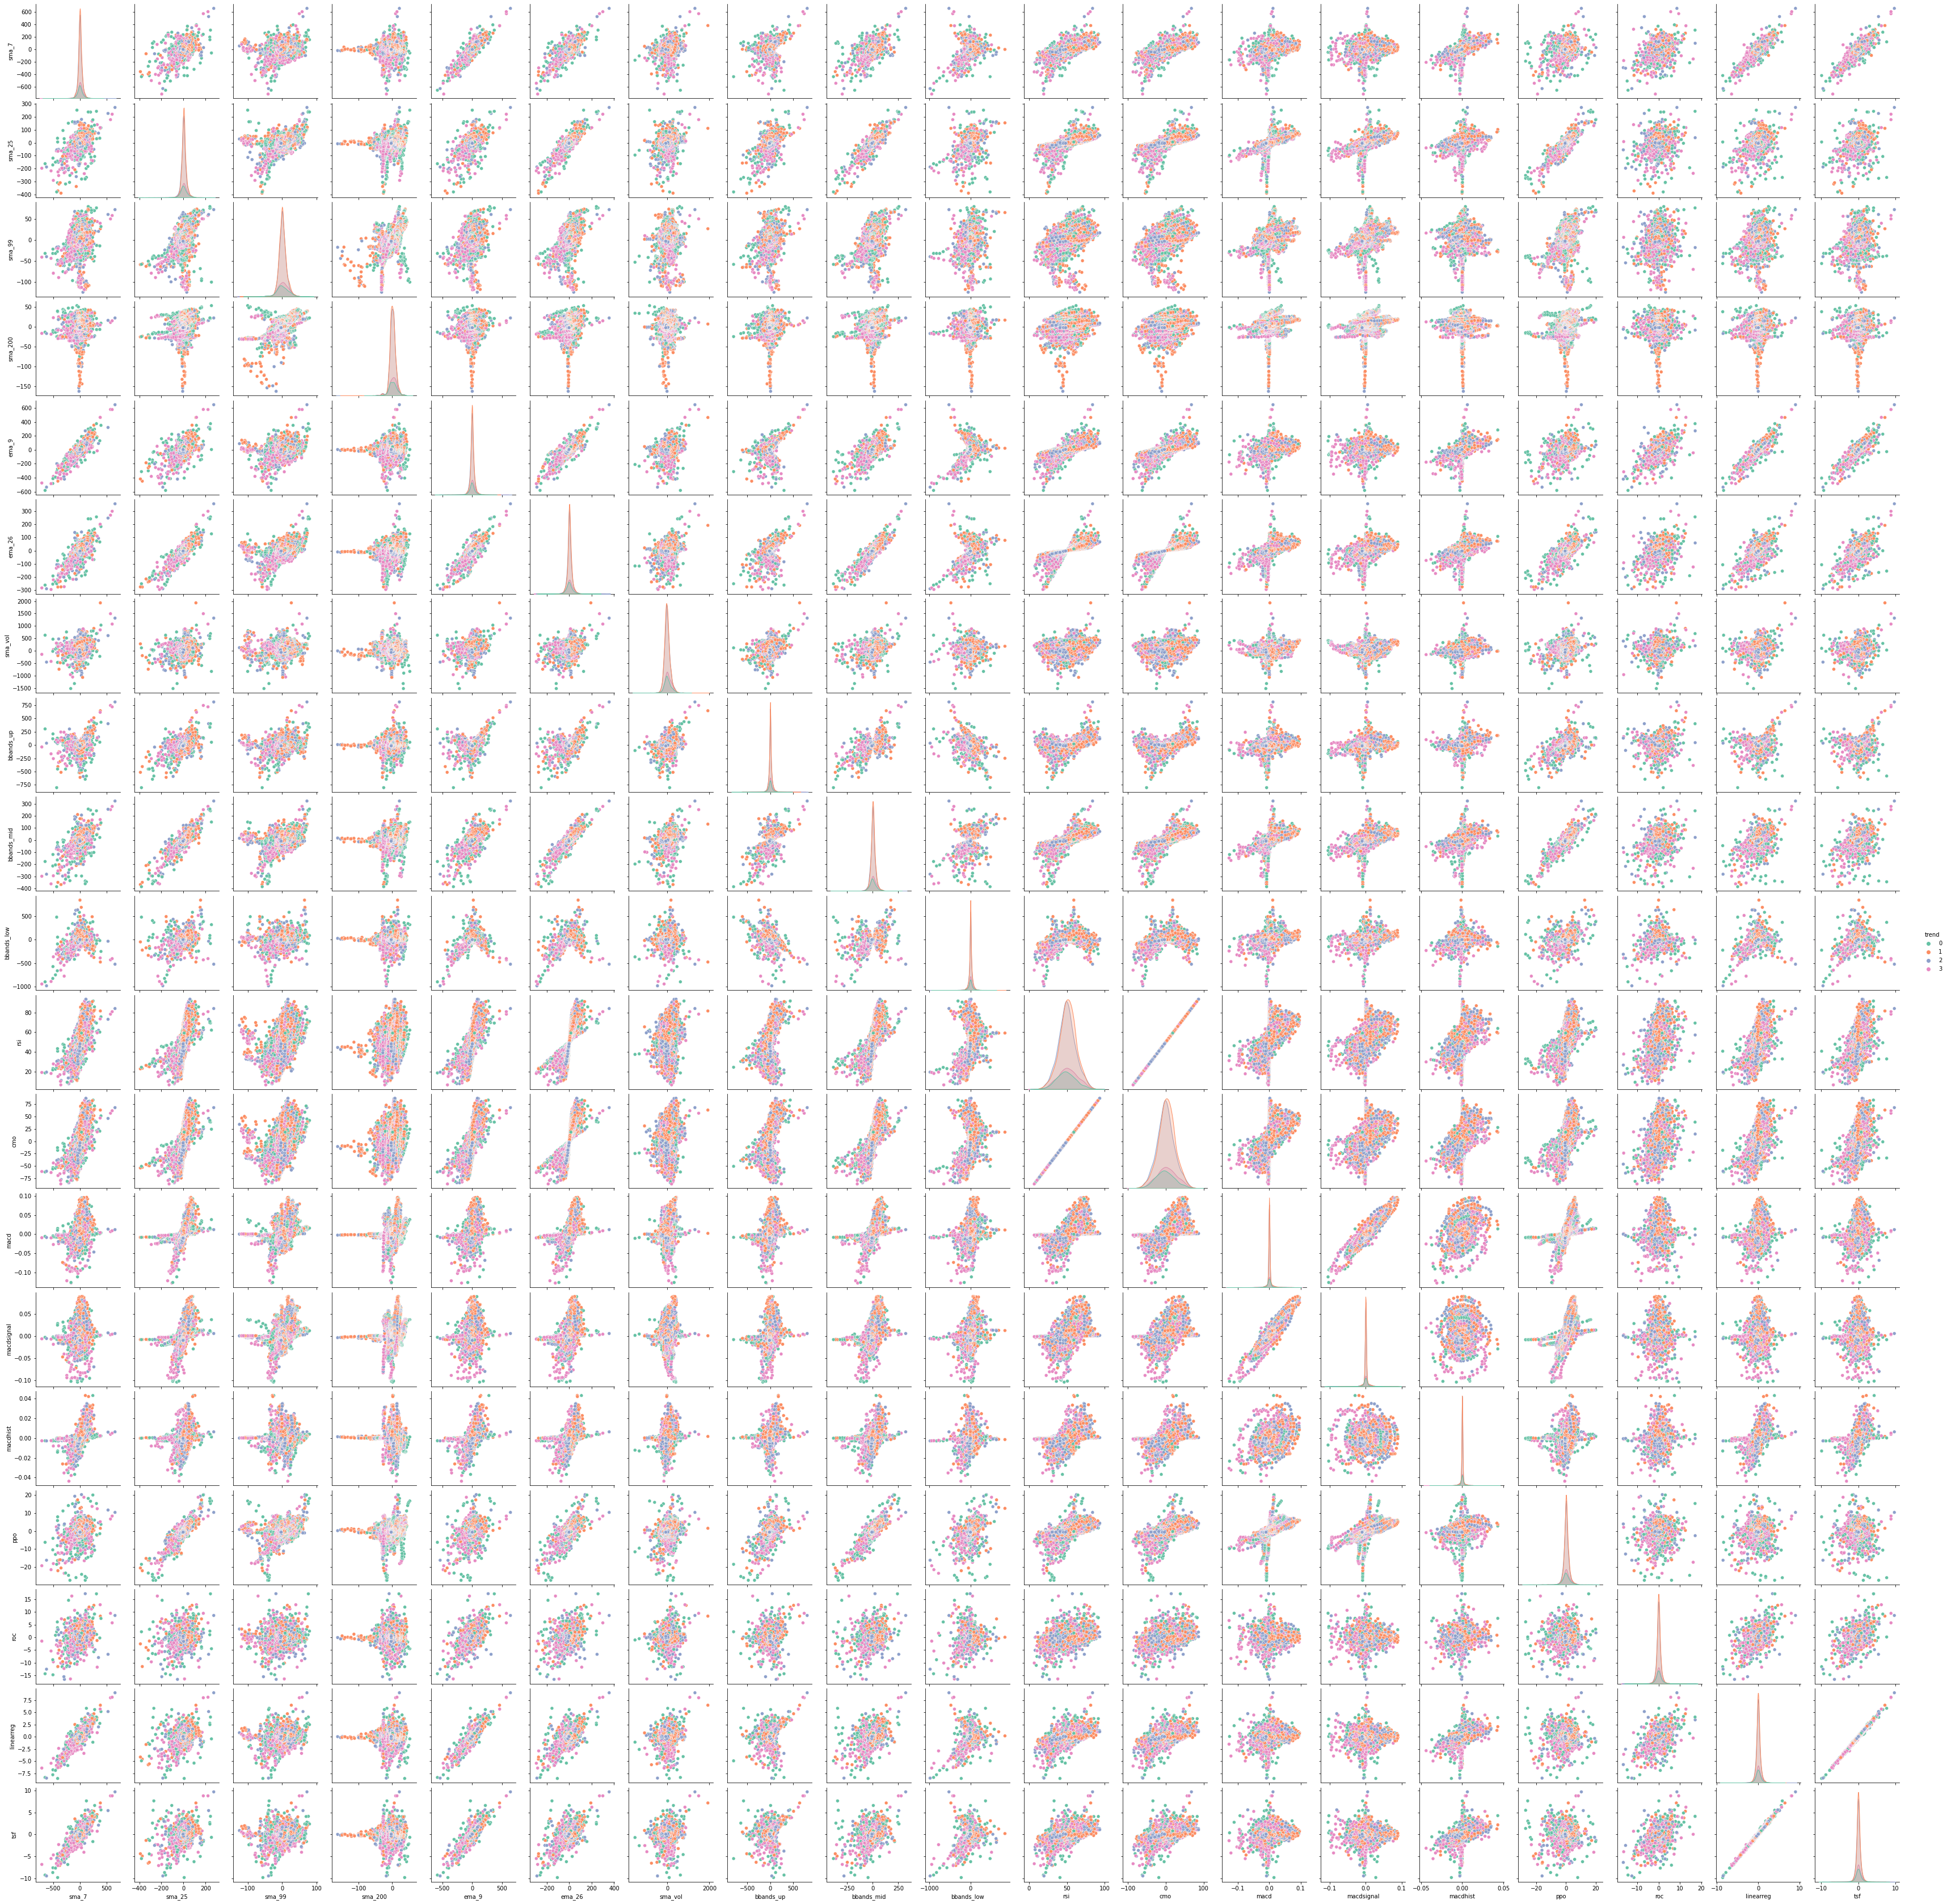

In [7]:
# sns_plot = sns.pairplot(crypto_ta_dataset,hue=label_name,palette='Set2')
# sns_plot.savefig("output.png")

In [8]:
# definir a estrutra a rede neuronal a utilizar
# Neste caso temos duas camadas escondidas com 10 nós
#     - Ativação do tipo relu (podem usar outras mas podem também escolher manter)
#     - Dense significa que cada camada liga a todas as outras (recomendado)
#     - Na primeira camada escondida indica-se, no parametro input_shape, que temos  entradas
# A camada de saída deve ter o mesmo número de saídas que o número de classes
#     - Por default a camada de saída devolve um logit para cada classe.
#     - Um logit é um numero entre -Inf e +Inf que representa a classificação antes de ser normalizada
#     - Podemos normalizar o resultado depois  para probalidades (usando a função softmax)
#     - Podemos também indicar que esta camada usa logo a softmax mas não é recomendado
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.nn.relu, input_shape=(19,)),  # input shape required
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(4)
])

In [9]:
# definir as configurações do algoritmo
# - Algoritmo usado para optimização (neste caso o SGD) com a learning rate 
#    - Podem decidir ajustar este parametro mas não é obrigatório
# - Função que será usada para a minimização na procura
#    - Neste caso usamos a SparseCategoricalCrossentropy
#    - SparseCategorical é usada quanda trabalhamos com inteiros como target
#    - from_logits=True indica que a saída da rede são logits
#        - Se não usarmos este parametro temos de usar a softmax na saída da rede
# - As metricas não são usadas para optimização, são usadas para dar output de resultados
#    - Podem-se usar várias métricas ao mesmo tempo, dará vários valores de output
#    - Neste caso estamos a usar a Accuracy (número )

# definir as configurações do algoritmo

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [10]:
# 1- Criar o Dataset
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

# Percentages de teste e validação
TEST_PERC = 0.1
VALID_PERC = 0.1

In [11]:
# 2- Separar por classe (vai permitir garantir que cada conjunto tem X de cada classe)
class0_dataset = dataset.filter(lambda x, y: y == 0)
class1_dataset = dataset.filter(lambda x, y: y == 1)
class2_dataset = dataset.filter(lambda x, y: y == 2)
class3_dataset = dataset.filter(lambda x, y: y == 3)
print()
print(class0_dataset.cardinality())
# quantidade de cada classe e total
DATASIZE = dataset.cardinality().numpy()
c0_size = len(list(class0_dataset))
c1_size = len(list(class1_dataset))
c2_size = len(list(class2_dataset))
c3_size = len(list(class3_dataset))
print(DATASIZE,c0_size,c1_size,c2_size,c3_size)


tf.Tensor(-2, shape=(), dtype=int64)
21955 2046 8865 8428 2616


In [12]:
# 3- Baralhar
class0_dataset = class0_dataset.shuffle(DATASIZE)
class1_dataset = class1_dataset.shuffle(DATASIZE)
class2_dataset = class2_dataset.shuffle(DATASIZE)
class3_dataset = class3_dataset.shuffle(DATASIZE)

In [13]:
# 4- Partir cada um
# Primeiro retiramos o teste
class0_test = class0_dataset.take(int(c0_size*TEST_PERC))
# variável temporária para separar entre treino e validação
# skip significa que vai ficar com o resto dos dados
rest = class0_dataset.skip(int(c0_size*TEST_PERC))
class0_validation = rest.take(int(c0_size*VALID_PERC))
class0_train = rest.skip(int(c0_size*VALID_PERC))

class1_test = class1_dataset.take(int(c1_size*TEST_PERC))
rest = class1_dataset.skip(int(c1_size*TEST_PERC))
class1_validation = rest.take(int(c1_size*VALID_PERC))
class1_train = rest.skip(int(c1_size*VALID_PERC))

class2_test = class2_dataset.take(int(c2_size*TEST_PERC))
rest = class2_dataset.skip(int(c2_size*TEST_PERC))
class2_validation = rest.take(int(c2_size*VALID_PERC))
class2_train = rest.skip(int(c2_size*VALID_PERC))

class3_test = class3_dataset.take(int(c3_size*TEST_PERC))
rest = class3_dataset.skip(int(c3_size*TEST_PERC))
class3_validation = rest.take(int(c3_size*VALID_PERC))
class3_train = rest.skip(int(c3_size*VALID_PERC))

In [14]:
#5- Juntar tudo novamente
train_dataset = class0_train.concatenate(class1_train).concatenate(class2_train).concatenate(class3_train).shuffle(DATASIZE)
test_dataset = class0_test.concatenate(class1_test).concatenate(class2_test).concatenate(class3_test).shuffle(DATASIZE)
validation_dataset = class0_validation.concatenate(class1_validation).concatenate(class2_validation).concatenate(class3_validation).shuffle(DATASIZE)

#confirmar tamanhos
print('Train dataset size = ', len(list(train_dataset)))
print('Validation dataset size = ', len(list(validation_dataset)))
print('Test dataset size = ', len(list(test_dataset)))

Train dataset size =  17569
Validation dataset size =  2193
Test dataset size =  2193


In [15]:
#6- Usar o dataset diretamente para treinar, validar e testar

# Converter o conjunto de treino de novo para o formato inicial (DataFrame)
feat,lab = map(list,zip(*list(train_dataset.as_numpy_iterator())))
train_features= pd.DataFrame(data=feat,columns=feature_names)
train_labels = pd.DataFrame(data=lab,columns=[label_name])

feat,lab = map(list,zip(*list(validation_dataset.as_numpy_iterator())))
valid_features= pd.DataFrame(data=feat,columns=feature_names)
valid_labels = pd.DataFrame(data=lab,columns=[label_name])

feat,lab = map(list,zip(*list(test_dataset.as_numpy_iterator())))
test_features= pd.DataFrame(data=feat,columns=feature_names)
test_labels = pd.DataFrame(data=lab,columns=[label_name])

In [16]:
# Correr o treino, indica as features as labels e o número de épocas
history = model.fit(train_features, train_labels, epochs=800,validation_data=(valid_features,valid_labels))
print(history)

Epoch 1/800
550/550 [==============================] - 1s 2ms/step - loss: 1.3472 - sparse_categorical_accuracy: 0.4041 - val_loss: 1.2146 - val_sparse_categorical_accuracy: 0.4309
Epoch 2/800
550/550 [==============================] - 1s 1ms/step - loss: 1.2058 - sparse_categorical_accuracy: 0.4270 - val_loss: 1.1648 - val_sparse_categorical_accuracy: 0.4487
Epoch 3/800
550/550 [==============================] - 1s 1ms/step - loss: 1.1809 - sparse_categorical_accuracy: 0.4341 - val_loss: 1.1669 - val_sparse_categorical_accuracy: 0.4309
Epoch 4/800
550/550 [==============================] - 1s 2ms/step - loss: 1.1637 - sparse_categorical_accuracy: 0.4505 - val_loss: 1.1577 - val_sparse_categorical_accuracy: 0.4414
Epoch 5/800
550/550 [==============================] - 1s 2ms/step - loss: 1.1532 - sparse_categorical_accuracy: 0.4528 - val_loss: 1.1422 - val_sparse_categorical_accuracy: 0.4437
Epoch 6/800
550/550 [==============================] - 1s 2ms/step - loss: 1.1580 - sparse_cate

In [17]:
# Correr no conjunto teste (com o que foi treinado) e obter o resultado
test = model.evaluate(test_features,test_labels)
print("Teste:\n",test)
loss,acc = test

69/69 [==============================] - 0s 761us/step - loss: 1.7453 - sparse_categorical_accuracy: 0.8618
Teste:
 [1.7452950477600098, 0.8618330955505371]


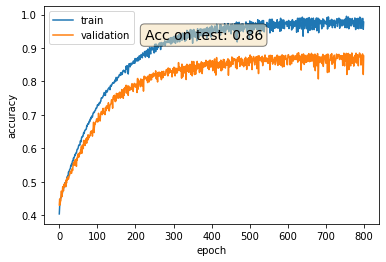

In [18]:
# ver um plot dos resultados de treino e teste 
# coloquei também o valor do teste, mas esse é só um ponto no final
# place a text box in upper left in axes coords
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.3, 0.90, "Acc on test: %.2f" % acc,  fontsize=14, transform=plt.axes().transAxes, 
        verticalalignment='top', bbox=props)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])

plt.show()